# Business Case: Delhivery - Feature Engineering

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

## How can you help here?



The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [251]:
import warnings
warnings.simplefilter('ignore')

In [62]:
df = pd.read_csv("delhivery_data.csv")
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [25]:
df.shape

(144867, 24)

In [26]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

**Dropping unknown fields**

In [63]:
unknown_fields = ["is_cutoff", "cutoff_factor", "cutoff_timestamp", "factor", "segment_factor"]
df = df.drop(columns = unknown_fields)

In [64]:
df.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
dtype: int64

**converting the datatype of column into category**

In [65]:
df["data"] = df["data"].astype("category")
df["route_type"] = df["route_type"].astype("category")

**Updating the datatype of the datetime columns**

In [66]:
datetime_col = ["trip_creation_time", "od_start_time", "od_end_time" ]
for i in datetime_col:
    df[i] = pd.to_datetime(df[i])

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

Reduction in the memory usage, before it was 25.6mb and now it is 19.1mb

### Basic data cleaning and exploration

**Handling missing values in the data.**

In [68]:
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

In [69]:
missing_source_name = df.loc[df['source_name'].isnull(),'source_center'].unique()
missing_source_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND509103AAC', 'IND126116AAA', 'IND331022A1B',
       'IND505326AAB', 'IND852118A1B'], dtype=object)

In [70]:
missing_destination_name =df.loc[df['destination_name'].isnull(),'destination_center'].unique()
missing_destination_name

array(['IND342902A1B', 'IND577116AAA', 'IND282002AAD', 'IND465333A1B',
       'IND841301AAC', 'IND505326AAB', 'IND852118A1B', 'IND126116AAA',
       'IND509103AAC', 'IND221005A1A', 'IND250002AAC', 'IND331001A1C',
       'IND122015AAC'], dtype=object)

In [271]:
c= 1
for i in missing_destination_name:
    mask = (df['destination_center'] == i) & (df['destination_name'].isna())
    df.loc[mask, 'destination_name'] = f'location_{c}'
    c += 1

for i in missing_source_name:
    d[i] = df.loc[df['destination_center'] == i, 'destination_name'].unique()

for idx, val in d.items():
    if len(val) == 0:
        d[idx] = [f'location_{c}']
        c += 1

d2 = {idx: val[0] for idx, val in d.items()}

for i, v in d2.items():
    print(i, v)


IND342902A1B location_1
IND577116AAA location_2
IND282002AAD location_3
IND465333A1B location_4
IND841301AAC location_5
IND509103AAC location_9
IND126116AAA location_8
IND331022A1B location_14
IND505326AAB location_6
IND852118A1B location_7


In [72]:
for i in missing_source_name:
    df.loc[df['source_center'] == i, 'source_name'] = df.loc[df['source_center'] == i, 'source_name'].replace(np.nan, d2[i])

In [73]:
df.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
dtype: int64

**Basic Description of the Data**

In [74]:
df.describe()

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000
mean,961.262986,234.073372,416.927527,213.868272,284.771297,36.196111,18.507548,22.82902
std,1037.012769,344.990009,598.103621,308.011085,421.119294,53.571158,14.775960,17.86066
min,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.00000
25%,161.000000,23.355874,51.000000,27.000000,29.914700,20.000000,11.000000,12.07010
50%,449.000000,66.126571,132.000000,64.000000,78.525800,29.000000,17.000000,23.51300
75%,1634.000000,286.708875,513.000000,257.000000,343.193250,40.000000,22.000000,27.81325
max,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.40370


### Merging of rows and aggregation of fields

In [272]:
group1 = ['trip_uuid', 'source_center', 'destination_center']
df1 = df.groupby(by = group1, as_index = False).agg({'data' : 'first',
                                                         'route_type' : 'first',
                                                       'trip_creation_time' : 'first',
                                                       'source_name' : 'first',
                                                       'destination_name' : 'last',
                                                       'od_start_time' : 'first',
                                                       'od_end_time' : 'first',
                                                       'start_scan_to_end_scan' : 'first',
                                                       'actual_distance_to_destination' : 'last',
                                                       'actual_time' : 'last',
                                                       'osrm_time' : 'last',
                                                       'osrm_distance' : 'last',
                                                       'segment_actual_time' : 'sum',
                                                       'segment_osrm_time' : 'sum',
                                                       'segment_osrm_distance' : 'sum'})
df1.head()

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408


### 3.1 Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required

In [274]:
df1['od_total_time'] = df1['od_end_time'] - df1['od_start_time']
df1.drop(columns = ['od_end_time', 'od_start_time'], inplace = True)
df1['od_total_time'] = df1['od_total_time'].apply(lambda x : round(x.total_seconds() / 60.0, 2))
df1['od_total_time'].head()

0    1260.60
1     999.51
2      58.83
3     122.78
4     834.64
Name: od_total_time, dtype: float64

In [275]:
df2 = df1.groupby(by = 'trip_uuid', as_index = False).agg({'source_center' : 'first',
                                                           'destination_center' : 'last',
                                                           'data' : 'first',
                                                           'route_type' : 'first',
                                                           'trip_creation_time' : 'first',
                                                           'source_name' : 'first',
                                                           'destination_name' : 'last',
                                                           'od_total_time' : 'sum',
                                                           'start_scan_to_end_scan' : 'sum',
                                                           'actual_distance_to_destination' : 'sum',
                                                           'actual_time' : 'sum',
                                                           'osrm_time' : 'sum',
                                                           'osrm_distance' : 'sum',
                                                           'segment_actual_time' : 'sum',
                                                           'segment_osrm_time' : 'sum',
                                                           'segment_osrm_distance' : 'sum'})
df2.head()

,trip_uuid,source_center,destination_center,data,route_type,trip_creation_time,source_name,destination_name,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2260.11,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),181.61,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),3934.36,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),100.49,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),718.34,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919


## 2. Build some features to prepare the data for actual analysis. Extract features from the below fields:

### Destination Name: Split and extract features out of destination. City-place-code (State)

In [284]:
def location_name_to_state(x):
    l = x.split('(')
    if len(l) == 1:
        return l[0]
    else:
        return l[1].replace(')', "")

In [285]:
def location_name_to_city(x):
    if 'location' in x:
        return 'unknown_city'
    else:
        l = x.split()[0].split('_')
        if 'CCU' in x:
            return 'Kolkata'
        elif 'MAA' in x.upper():
            return 'Chennai'
        elif ('HBR' in x.upper()) or ('BLR' in x.upper()):
            return 'Bengaluru'
        elif 'FBD' in x.upper():
            return 'Faridabad'
        elif 'BOM' in x.upper():
            return 'Mumbai'
        elif 'DEL' in x.upper():
            return 'Delhi'
        elif 'OK' in x.upper():
            return 'Delhi'
        elif 'GZB' in x.upper():
            return 'Ghaziabad'
        elif 'GGN' in x.upper():
            return 'Gurgaon'
        elif 'AMD' in x.upper():
            return 'Ahmedabad'
        elif 'CJB' in x.upper():
            return 'Coimbatore'
        elif 'HYD' in x.upper():
            return 'Hyderabad'
        return l[0]

In [286]:
def location_name_to_place(x):
    if 'location' in x:
        return x
    elif 'HBR' in x:
        return 'HBR Layout PC'
    else:
        l = x.split()[0].split('_', 1)
        if len(l) == 1:
            return 'unknown_place'
        else:
            return l[1]

In [308]:
df2['destination_state'] = df2['destination_name'].apply(location_name_to_state)
df2['destination_state'].head()

0    Uttar Pradesh
1        Karnataka
2          Haryana
3      Maharashtra
4        Karnataka
Name: destination_state, dtype: object

In [309]:
df2['destination_city'] = df2['destination_name'].apply(location_name_to_city)
df2['destination_city'].head()

0        Kanpur
1    Doddablpur
2       Gurgaon
3        Mumbai
4        Sandur
Name: destination_city, dtype: object

In [310]:
df2['destination_place'] = df2['destination_name'].apply(location_name_to_place)
df2['destination_place'].head()

0    Central_H_6
1     ChikaDPP_D
2    Bilaspur_HB
3      MiraRd_IP
4     WrdN1DPP_D
Name: destination_place, dtype: object

### Source Name: Split and extract features out of destination. City-place-code (State)

In [287]:
df2['source_state'] = df2['source_name'].apply(location_name_to_state)
df2['source_state'].unique()

array(['Uttar Pradesh', 'Karnataka', 'Haryana', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana', 'Rajasthan',
       'Assam', 'Madhya Pradesh', 'West Bengal', 'Andhra Pradesh',
       'Punjab', 'Chandigarh', 'Goa', 'Jharkhand', 'Pondicherry',
       'Orissa', 'Uttarakhand', 'Himachal Pradesh', 'Kerala',
       'Arunachal Pradesh', 'Bihar', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Jammu & Kashmir', 'Mizoram', 'Nagaland',
       'location_9', 'location_3', 'location_2', 'location_14',
       'location_7'], dtype=object)

In [288]:
df2['source_city'] = df2['source_name'].apply(location_name_to_city)
print('No of source cities :', df2['source_city'].nunique())
df2['source_city'].unique()[:50]

No of source cities : 690


array(['Kanpur', 'Doddablpur', 'Gurgaon', 'Mumbai', 'Bellary', 'Chennai',
       'Bengaluru', 'Surat', 'Delhi', 'Pune', 'Faridabad', 'Shirala',
       'Hyderabad', 'Thirumalagiri', 'Gulbarga', 'Jaipur', 'Allahabad',
       'Guwahati', 'Narsinghpur', 'Shrirampur', 'Madakasira', 'Sonari',
       'Dindigul', 'Jalandhar', 'Chandigarh', 'Deoli', 'Pandharpur',
       'Kolkata', 'Bhandara', 'Kurnool', 'Bhiwandi', 'Bhatinda',
       'RoopNagar', 'Bantwal', 'Lalru', 'Kadi', 'Shahdol', 'Gangakher',
       'Durgapur', 'Vapi', 'Jamjodhpur', 'Jetpur', 'Mehsana', 'Jabalpur',
       'Junagadh', 'Gundlupet', 'Mysore', 'Goa', 'Bhopal', 'Sonipat'],
      dtype=object)

In [289]:
df2['source_place'] = df2['source_name'].apply(location_name_to_place)
df2['source_place'].unique()[:50]

array(['Central_H_6', 'ChikaDPP_D', 'Bilaspur_HB', 'unknown_place', 'Dc',
       'Poonamallee', 'Chrompet_DPC', 'HBR Layout PC', 'Central_D_12',
       'Lajpat_IP', 'North_D_3', 'Balabhgarh_DPC', 'Central_DPP_3',
       'Shamshbd_H', 'Xroad_D', 'Nehrugnj_I', 'Central_I_7',
       'Central_H_1', 'Nangli_IP', 'North', 'KndliDPP_D', 'Central_D_9',
       'DavkharRd_D', 'Bandel_D', 'RTCStand_D', 'Central_DPP_1',
       'KGAirprt_HB', 'North_D_2', 'Central_D_1', 'DC', 'Mthurard_L',
       'Mullanpr_DC', 'Central_DPP_2', 'RajCmplx_D', 'Beliaghata_DPC',
       'RjnaiDPP_D', 'AbbasNgr_I', 'Mankoli_HB', 'DPC', 'Airport_H',
       'Hub', 'Gateway_HB', 'Tathawde_H', 'ChotiHvl_DC', 'Trmltmpl_D',
       'OnkarDPP_D', 'Mehmdpur_H', 'KaranNGR_D', 'Sohagpur_D',
       'Chrompet_L'], dtype=object)

### Trip_creation_time: Extract features like month, year and day etc

In [99]:
df2['trip_creation_date'] = pd.to_datetime(df2['trip_creation_time'].dt.date)
df2['trip_creation_date'].head()

0   2018-09-12
1   2018-09-12
2   2018-09-12
3   2018-09-12
4   2018-09-12
Name: trip_creation_date, dtype: datetime64[ns]

In [102]:
df2['trip_creation_year'] = df2['trip_creation_time'].dt.year
df2['trip_creation_year'] = df2['trip_creation_year'].astype('int16')
df2['trip_creation_year'].head()

0    2018
1    2018
2    2018
3    2018
4    2018
Name: trip_creation_year, dtype: int16

In [101]:
df2['trip_creation_month'] = df2['trip_creation_time'].dt.month
df2['trip_creation_month'] = df2['trip_creation_month'].astype('int8')
df2['trip_creation_month'].head()

0    9
1    9
2    9
3    9
4    9
Name: trip_creation_month, dtype: int8

In [103]:
df2['trip_creation_week'] = df2['trip_creation_time'].dt.isocalendar().week
df2['trip_creation_week'] = df2['trip_creation_week'].astype('int8')
df2['trip_creation_week'].head()

0    37
1    37
2    37
3    37
4    37
Name: trip_creation_week, dtype: int8

In [100]:
df2['trip_creation_day'] = df2['trip_creation_time'].dt.day
df2['trip_creation_day'] = df2['trip_creation_day'].astype('int8')
df2['trip_creation_day'].head()

0    12
1    12
2    12
3    12
4    12
Name: trip_creation_day, dtype: int8

In [104]:
df2['trip_creation_hour'] = df2['trip_creation_time'].dt.hour
df2['trip_creation_hour'] = df2['trip_creation_hour'].astype('int8')
df2['trip_creation_hour'].head()

0    0
1    0
2    0
3    0
4    0
Name: trip_creation_hour, dtype: int8

In [107]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
od_total_time,14817.0,531.697630,658.868223,23.460000,149.930000,280.770000,638.200000,7898.550000
start_scan_to_end_scan,14817.0,530.810016,658.705957,23.000000,149.000000,280.000000,637.000000,7898.000000
actual_distance_to_destination,14817.0,164.477838,305.388147,9.002461,22.837239,48.474072,164.583208,2186.531787
actual_time,14817.0,357.143754,561.396157,9.000000,67.000000,149.000000,370.000000,6265.000000
osrm_time,14817.0,161.384018,271.360995,6.000000,29.000000,60.000000,168.000000,2032.000000
osrm_distance,14817.0,204.344689,370.395573,9.072900,30.819200,65.618800,208.475000,2840.081000
segment_actual_time,14817.0,353.892286,556.247965,9.000000,66.000000,147.000000,367.000000,6230.000000
segment_osrm_time,14817.0,180.949787,314.542047,6.000000,31.000000,65.000000,185.000000,2564.000000
segment_osrm_distance,14817.0,223.201161,416.628374,9.072900,32.654500,70.154400,218.802400,3523.632400
trip_creation_day,14817.0,18.370790,7.893275,1.000000,14.000000,19.000000,25.000000,30.000000


In [108]:
df2.describe(include=object).T

,count,unique,top,freq
trip_uuid,14817,14817,trip-153671041653548748,1
source_center,14817,938,IND000000ACB,1063
destination_center,14817,1042,IND000000ACB,821
source_name,14817,938,Gurgaon_Bilaspur_HB (Haryana),1063
destination_name,14817,1042,Gurgaon_Bilaspur_HB (Haryana),821
source_state,14817,34,Maharashtra,2714
source_city,14817,690,Mumbai,1442
source_place,14817,761,Bilaspur_HB,1063
destination_state,14817,39,Maharashtra,2561
destination_city,14817,806,Mumbai,1548


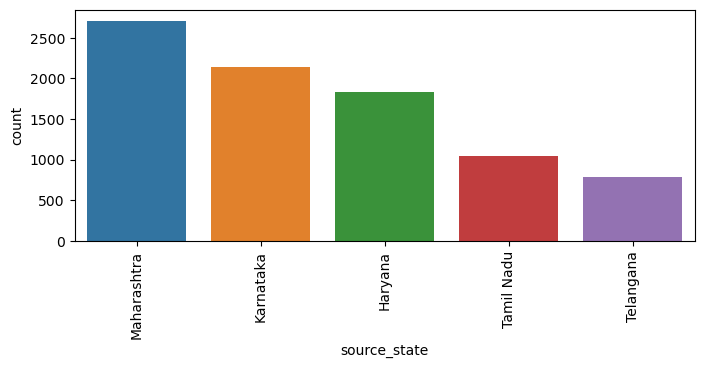

In [298]:
df_city=df2['source_state'].value_counts()[:5].reset_index()
plt.figure(figsize=(8,3))
ax=sns.barplot(data=df_city,x=df_city['index'],y=df_city['source_state'])
plt.xticks(rotation=90)
plt.xlabel("source_state")
plt.ylabel("count")
plt.show()

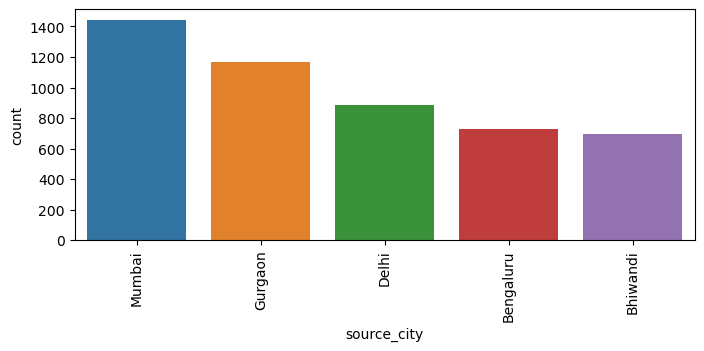

In [297]:
df_city=df2['source_city'].value_counts()[:5].reset_index()
plt.figure(figsize=(8,3))
ax=sns.barplot(data=df_city,x=df_city['index'],y=df_city['source_city'])
plt.xticks(rotation=90)
plt.xlabel("source_city")
plt.ylabel("count")
plt.show()

###  Trips on the hourly basis

In [109]:
df_hour = df2.groupby('trip_creation_hour')['trip_uuid'].count().to_frame().reset_index()
df_hour.head()

,trip_creation_hour,trip_uuid
0,0,994
1,1,750
2,2,702
3,3,652
4,4,636


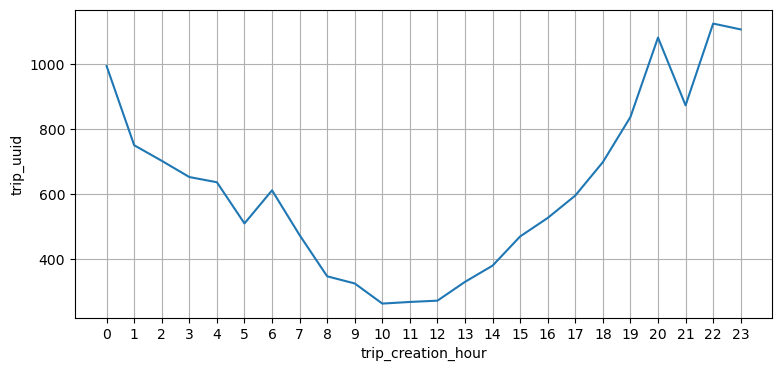

In [119]:
plt.figure(figsize = (9, 4))
sns.lineplot(data = df_hour, x = df_hour['trip_creation_hour'], y = df_hour['trip_uuid'], markers = '*')
plt.xticks(np.arange(0,24))
plt.grid('x')
plt.show()

The plot suggests that the number of trips begins to rise after noon, peaks at 10 P.M., and subsequently declines.

###  Trips for the different days of the month 

In [116]:
df_day = df2.groupby('trip_creation_day')['trip_uuid'].count().to_frame().reset_index()
df_day.head()

,trip_creation_day,trip_uuid
0,1,605
1,2,552
2,3,631
3,12,747
4,13,750


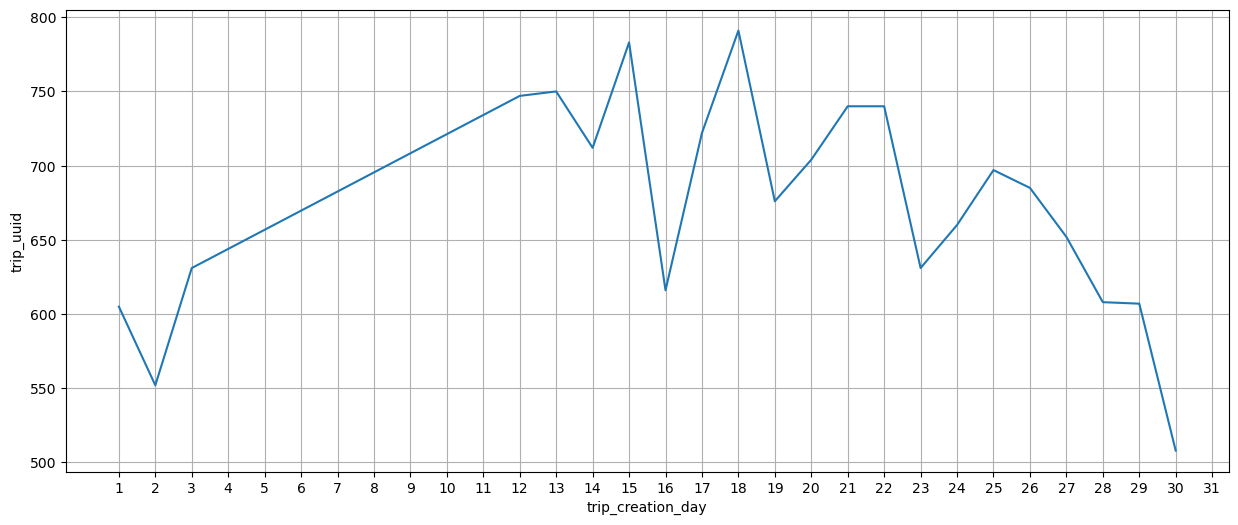

In [120]:
plt.figure(figsize = (15, 6))
sns.lineplot(data = df_day, x = df_day['trip_creation_day'], y = df_day['trip_uuid'], markers = 'o')
plt.xticks(np.arange(1, 32))
plt.grid('x')
plt.show()

The plot indicates that the majority of trips are generated in the middle of the month, suggesting that customers tend to place more orders during that time frame.

### Distribution of trip data for the orders 

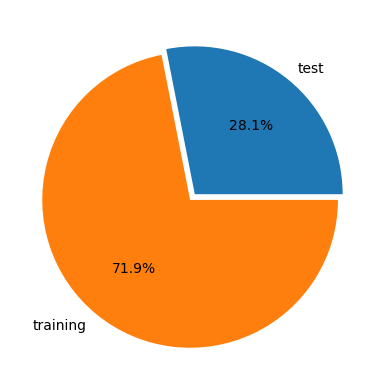

In [125]:
df_data = df2.groupby('data')['trip_uuid'].count().to_frame().reset_index()
df_data['percentage'] = np.round(df_data['trip_uuid'] * 100/ df_data['trip_uuid'].sum(), 2)
plt.pie(x = df_data['trip_uuid'],labels = df_data['data'], explode = [0, 0.05], autopct = '%.1f%%')
plt.show()

### Distribution of route types for the orders 

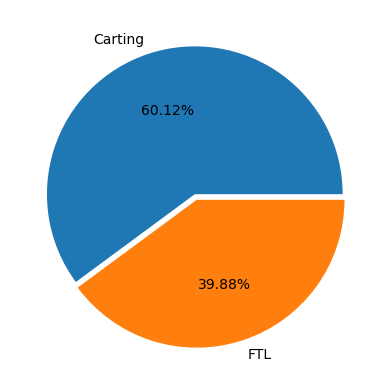

In [131]:
df_route = df2.groupby('route_type')['trip_uuid'].count().to_frame().reset_index()
df_route['percentage'] = np.round(df_route['trip_uuid'] * 100/ df_route['trip_uuid'].sum(), 2)
plt.pie(x = df_route['trip_uuid'], labels = ['Carting', 'FTL'],explode = [0, 0.04], autopct = '%.2f%%')
plt.show()

### Distribution of number of trips created from different states 

In [134]:
df_source_state = df2.groupby('source_state')['trip_uuid'].count().to_frame().reset_index()
df_source_state['percentage'] = np.round(df_source_state['trip_uuid'] * 100/ df_source_state['trip_uuid'].sum(), 2)
df_source_state = df_source_state.sort_values(by = 'trip_uuid', ascending = False)
df_source_state.head()

,source_state,trip_uuid,percentage
17,Maharashtra,2714,18.32
14,Karnataka,2143,14.46
10,Haryana,1838,12.40
24,Tamil Nadu,1039,7.01
25,Telangana,781,5.27


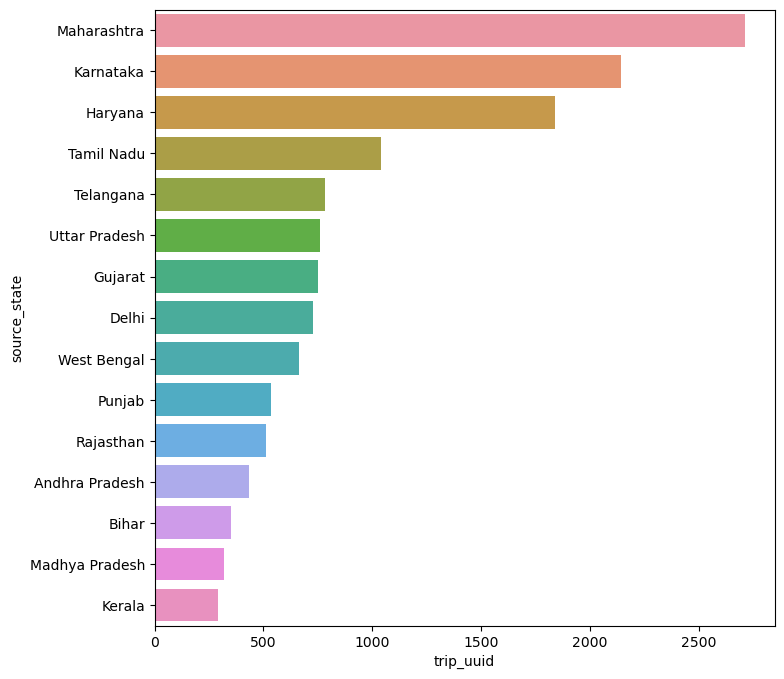

In [302]:
plt.figure(figsize = (8, 8))
sns.barplot(data = df_source_state, x = df_source_state['trip_uuid'], y = df_source_state['source_state'].head(15))
plt.show()

The plot reveals that Maharashtra has the highest number of originated trips, followed by Karnataka and Haryana. This suggests a robust seller presence in these states.

###  20 cities based on the number of trips created from different cities 

In [303]:
df_source_city = df2.groupby('source_city')['trip_uuid'].count().to_frame().reset_index()
df_source_city['percentage'] = np.round(df_source_city['trip_uuid'] * 100/ df_source_city['trip_uuid'].sum(), 2)
df_source_city = df_source_city.sort_values('trip_uuid', ascending = False)[:20]
df_source_city.head(10)

,source_city,trip_uuid,percentage
439,Mumbai,1442,9.73
237,Gurgaon,1165,7.86
169,Delhi,883,5.96
79,Bengaluru,726,4.90
100,Bhiwandi,697,4.70
58,Bangalore,648,4.37
136,Chennai,568,3.83
264,Hyderabad,524,3.54
516,Pune,480,3.24
357,Kolkata,356,2.40


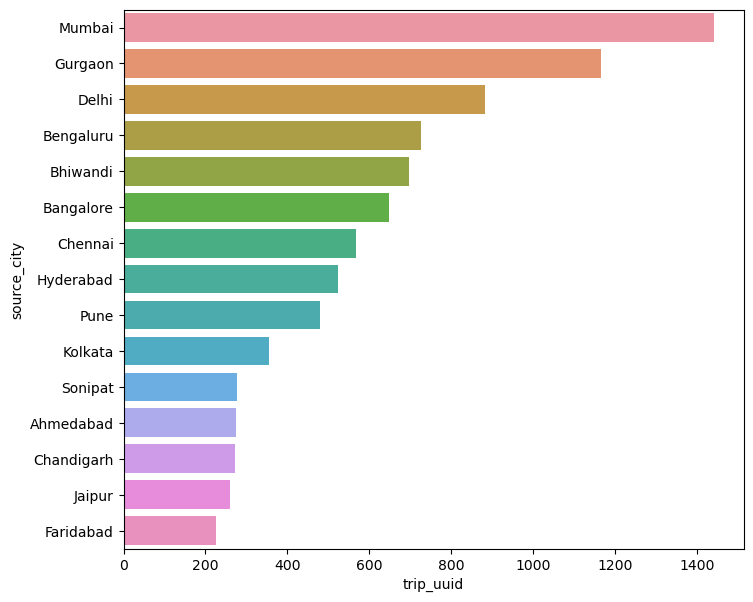

In [304]:
plt.figure(figsize = (8, 7))
sns.barplot(data = df_source_city, x = df_source_city['trip_uuid'], y = df_source_city['source_city'].head(15))
plt.show()

-The plot illustrates that Mumbai has the highest number of originated trips, followed by Gurgaon, Delhi, Bengaluru, and Bhiwandi. This indicates a strong seller presence in these cities.

###   Distribution of number of trips which ended in different states 

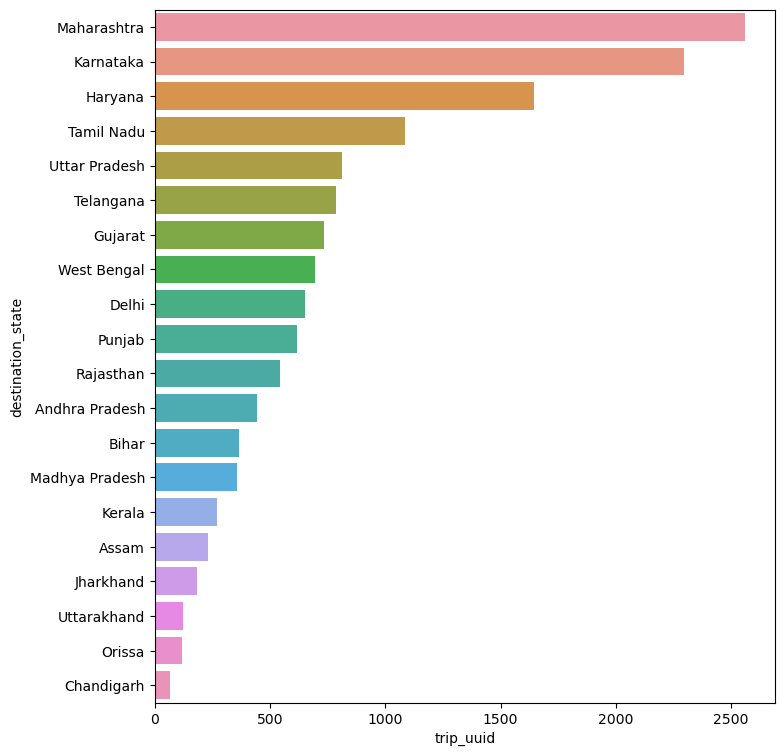

In [312]:
df_destination_state = df2.groupby('destination_state')['trip_uuid'].count().to_frame().reset_index()
df_destination_state['perc'] = np.round(df_destination_state['trip_uuid'] * 100/ df_destination_state['trip_uuid'].sum(), 2)
df_destination_state = df_destination_state.sort_values('trip_uuid', ascending = False)

plt.figure(figsize = (8, 9))
sns.barplot(data = df_destination_state, x = df_destination_state['trip_uuid'], y = df_destination_state['destination_state'].head(20))
plt.show()

* highest number of trips ended in Maharashtra, followed by Karnataka, Haryana, Tamil Nadu, and Uttar Pradesh. 

In [148]:
num_columns = ['od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination',
                    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance']

df_corr = df2[num_columns].corr()
df_corr

,od_total_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
od_total_time,1.000000,0.999999,0.918222,0.961094,0.926516,0.924219,0.961119,0.918490,0.919199
start_scan_to_end_scan,0.999999,1.000000,0.918308,0.961147,0.926571,0.924299,0.961171,0.918561,0.919291
actual_distance_to_destination,0.918222,0.918308,1.000000,0.953757,0.993561,0.997264,0.952821,0.987538,0.993061
actual_time,0.961094,0.961147,0.953757,1.000000,0.958593,0.959214,0.999989,0.953872,0.956967
osrm_time,0.926516,0.926571,0.993561,0.958593,1.000000,0.997580,0.957765,0.993259,0.991608
osrm_distance,0.924219,0.924299,0.997264,0.959214,0.997580,1.000000,0.958353,0.991798,0.994710
segment_actual_time,0.961119,0.961171,0.952821,0.999989,0.957765,0.958353,1.000000,0.953039,0.956106
segment_osrm_time,0.918490,0.918561,0.987538,0.953872,0.993259,0.991798,0.953039,1.000000,0.996092
segment_osrm_distance,0.919199,0.919291,0.993061,0.956967,0.991608,0.994710,0.956106,0.996092,1.000000


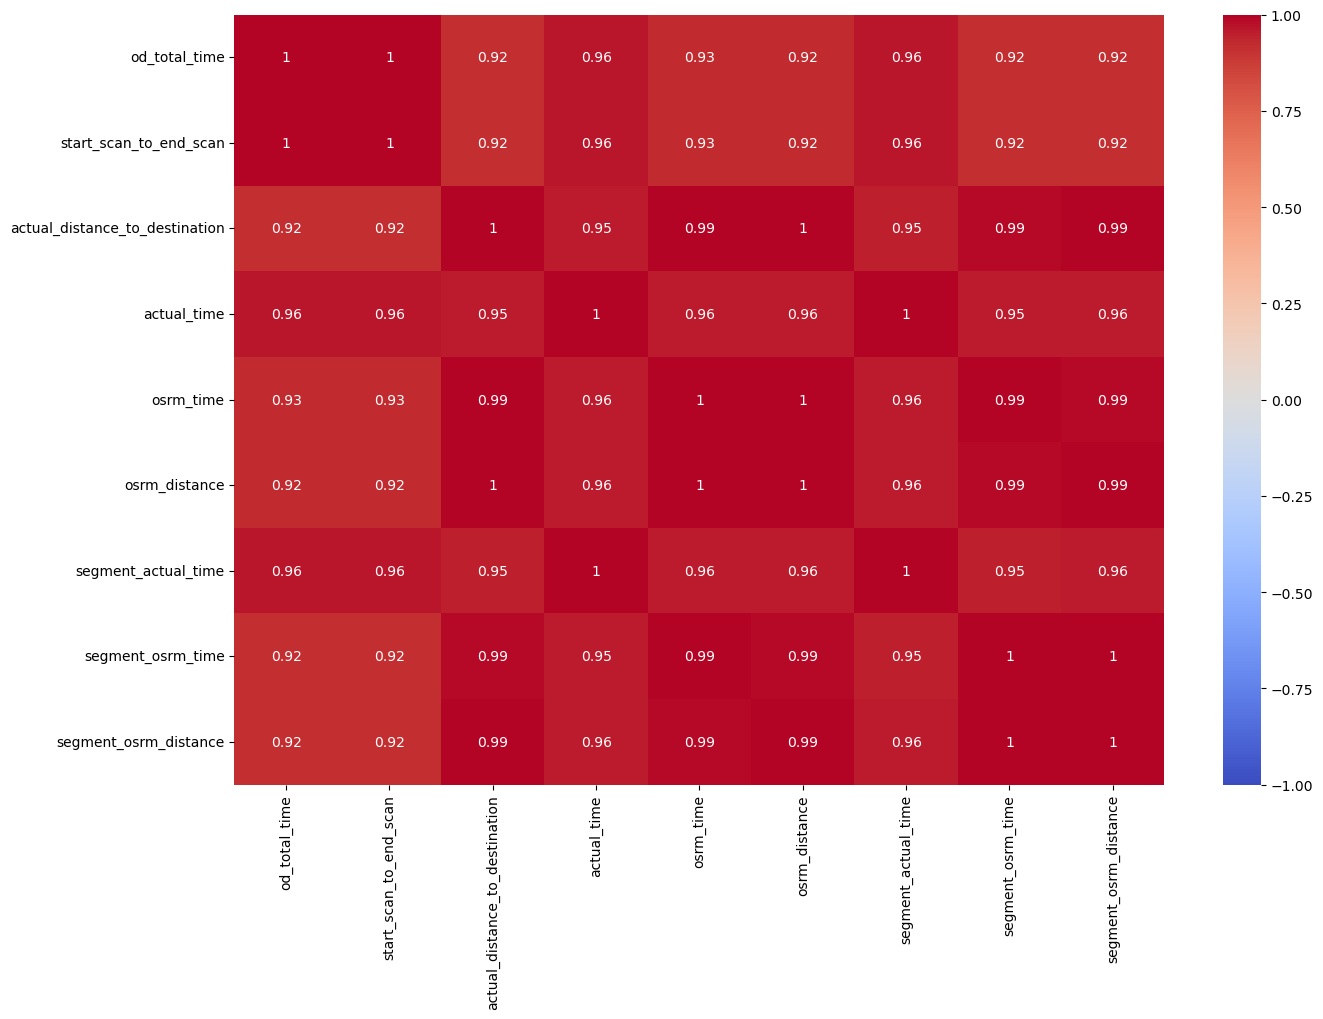

In [151]:
plt.figure(figsize = (15, 10))
sns.heatmap(data=df_corr, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.show()


- There is a strong correlation (> 0.9) among the specified numerical columns.

## 3. In-depth analysis and feature engineering:

### 3.2 Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.

***STEP-1*** : Set up Null Hypothesis

---



  * **Null Hypothesis ( H0 )** - Total Trip Time and  Expected total trip time are same.

  * **Alternate Hypothesis ( HA )** - Total Trip Time and Expected total trip time are different.

***STEP-2*** : Checking for basic assumpitons for the hypothesis

---
* Distribution check using **QQ Plot**
* Homogeneity of Variances using **Lavenes test**

***STEP-3***: Define Test statistics

---
* If the assumptions of the T-Test are satisfied, we can proceed with conducting the T-Test for independent samples. Otherwise, we will resort to performing the non-parametric equivalent of the T-Test for independent samples, namely the Mann-Whitney U rank test for two independent samples.


***STEP-4***: Compute the p-value and fix value of alpha.

---
* We set our ***alpha to be 0.05***

***STEP-5***: Compare p-value and alpha.

---

* Based on p-value, we will accept or reject H0.


  1.   **p-val > alpha** : Accept H0
  2.   **p-val < alpha** : Reject H0

- Visual Tests to know if the samples follow normal distribution

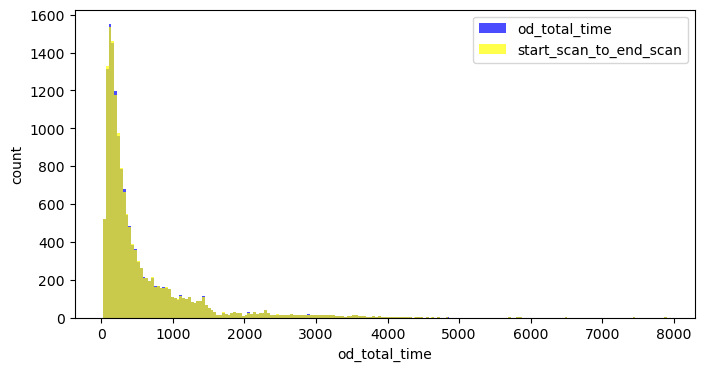

In [164]:
plt.figure(figsize=(8, 4))
plt.hist(df2['od_total_time'], bins='auto', color='blue', alpha=0.7, label='od_total_time')
plt.hist(df2['start_scan_to_end_scan'], bins='auto', color='yellow', alpha=0.7, label='start_scan_to_end_scan')
plt.legend()
plt.xlabel('od_total_time')
plt.ylabel('count')
plt.show()

- Distribution check using QQ Plot

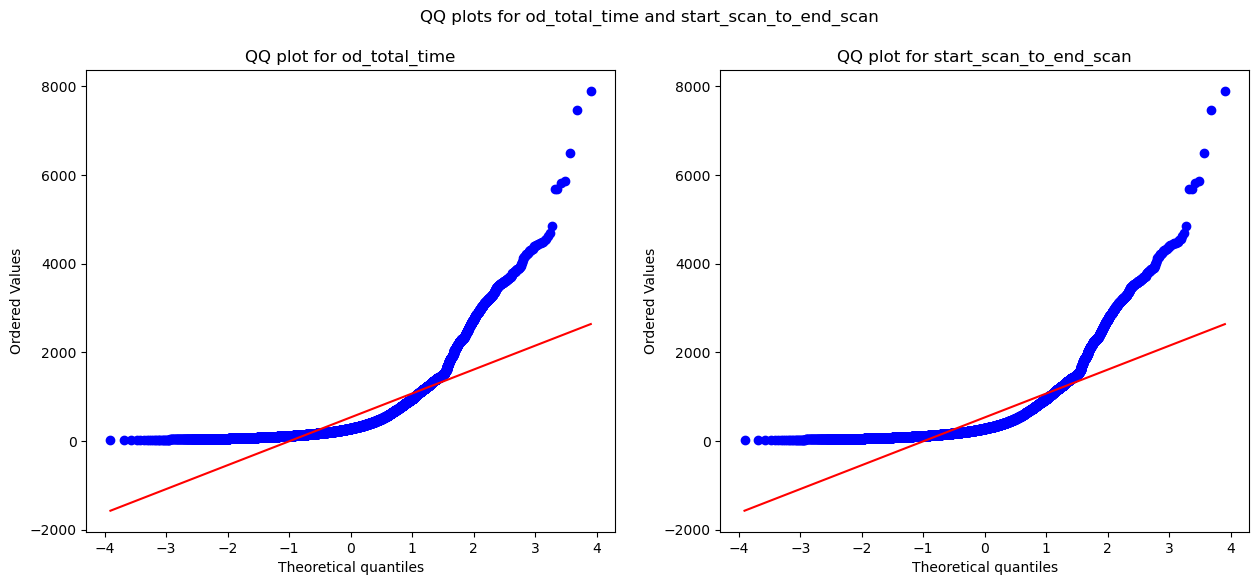

In [165]:
from scipy.stats import probplot

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for od_total_time and start_scan_to_end_scan')
probplot(df2['od_total_time'], plot=plt.subplot(1, 2, 1), dist='norm', fit=True)
plt.title('QQ plot for od_total_time')
plt.subplot(1, 2, 2)
probplot(df2['start_scan_to_end_scan'], plot=plt.subplot(1, 2, 2), dist='norm', fit=True)
plt.title('QQ plot for start_scan_to_end_scan')
plt.show()

From the above plot it seems sample doesn't follow  normal distribution

**Shapiro-Wilk test for normality**

In [168]:
import scipy.stats as spy

test_stat, p_value = spy.shapiro(df2['od_total_time'].sample(3000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 0.0
The sample does not follow normal distribution


**Homogeneity of Variances using Lavene's test**

In [169]:
test_stat, p_value = spy.levene(df2['od_total_time'], df2['start_scan_to_end_scan'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 0.9668007217581142
The samples have Homogenous Variance 


- As the samples do not exhibit a normal distribution, the application of the T-Test is not suitable in this context. Instead, we can utilize its non-parametric equivalent, namely the Mann-Whitney U rank test, for comparing two independent samples.

In [170]:
test_stat, p_value = spy.mannwhitneyu(df2['od_total_time'], df2['start_scan_to_end_scan'])
print('P-value :',p_value)

P-value : 0.7815123224221716


**Since p-value > alpha therfore it can be concluded that od_total_time and start_scan_to_end_scan are similar**

### 3.3 Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

In [172]:
df2[['actual_time', 'osrm_time']].describe()


,actual_time,osrm_time
count,14817.000000,14817.000000
mean,357.143754,161.384018
std,561.396157,271.360995
min,9.000000,6.000000
25%,67.000000,29.000000
50%,149.000000,60.000000
75%,370.000000,168.000000
max,6265.000000,2032.000000


**Null Hypothesis** - There is no difference between actual_time and osrm_time.

**Alternative Hypothesis** - There is significant difference between actual_time and osrm_time

Checking the sample if it follows the normal distribution

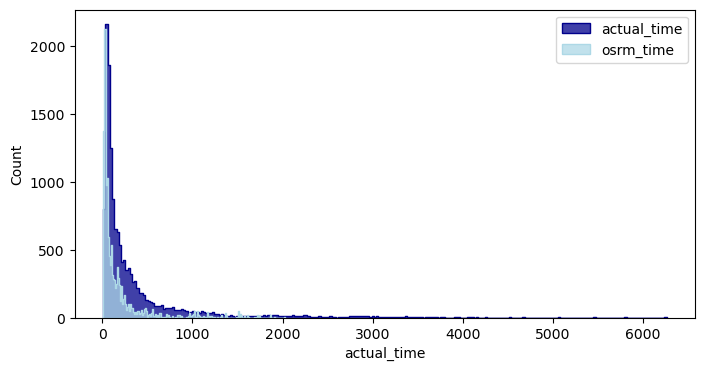

In [176]:
plt.figure(figsize = (8, 4))
sns.histplot(df2['actual_time'], element = 'step', color = 'darkblue')
sns.histplot(df2['osrm_time'], element = 'step', color = 'lightblue')
plt.legend(['actual_time', 'osrm_time'])
plt.show()

**Distribution check using QQ Plot**

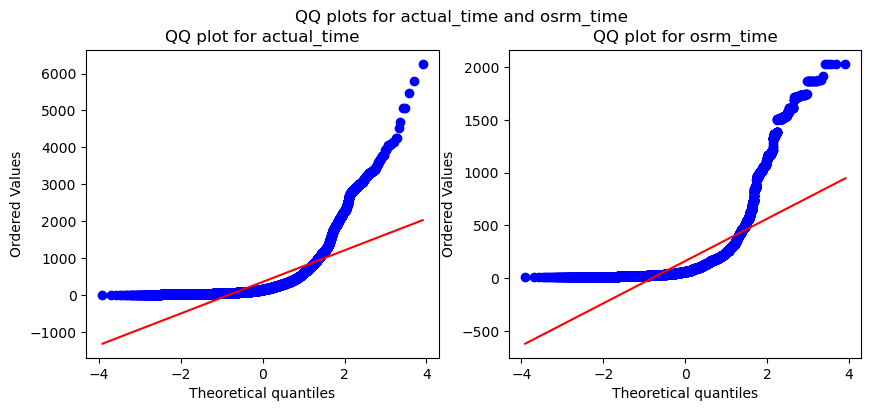

In [179]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and osrm_time')
probplot(df2['actual_time'], plot=plt.subplot(1, 2, 1), dist='norm', fit=True)
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
probplot(df2['osrm_time'], plot=plt.subplot(1, 2, 2), dist='norm', fit=True)
plt.title('QQ plot for osrm_time')
plt.show()

**samples do not follow normal distribution**

- Apply Shapiro-Wilk test


$H_0$ : The sample **follows normal distribution**
$H_1$ : The sample **does not follow normal distribution**

alpha = 0.05

Test Statistics : **Shapiro-Wilk test for normality**

In [181]:
test_stat, p_value = spy.shapiro(df2['actual_time'].sample(3000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


In [182]:
test_stat, p_value = spy.shapiro(df2['osrm_time'].sample(5000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


**Homogeneity of Variances using Lavene's test**

In [183]:
test_stat, p_value = spy.levene(df2['actual_time'], df2['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 1.871297993683208e-220
The samples do not have  Homogenous Variance


- As the samples do not exhibit a normal distribution, the application of the T-Test is not suitable in this context. Instead, we can utilize its non-parametric equivalent, namely the Mann-Whitney U rank test, for comparing two independent samples.

In [184]:
test_stat, p_value = spy.mannwhitneyu(df2['actual_time'], df2['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ') 

p-value 0.0
The samples are not similar


**Since p-value < alpha therfore it can be concluded that actual_time and osrm_time are not similar.**

### 3.4 Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)

**Null Hypothesis** - There is no difference between actual_time and segment_actual_time.

**Alternative Hypothesis** - There is significant difference between actual_time and segment_actual_time

- Visual Tests to know if the samples follow normal distribution

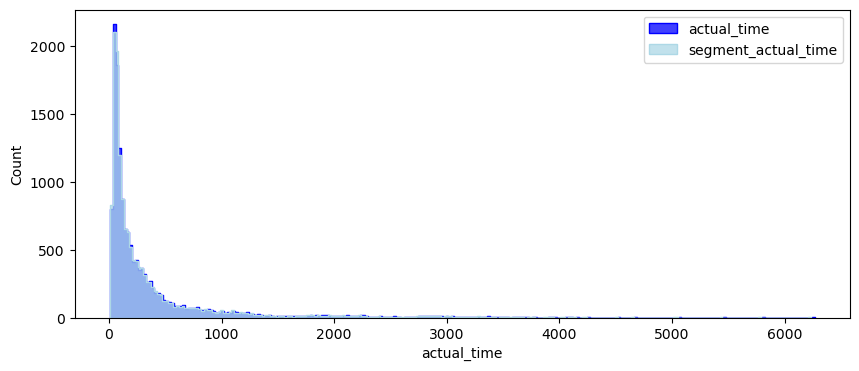

In [190]:
plt.figure(figsize = (10, 4))
sns.histplot(df2['actual_time'], element = 'step', color = 'blue')
sns.histplot(df2['segment_actual_time'], element = 'step', color = 'lightblue')
plt.legend(['actual_time', 'segment_actual_time'])
plt.show()

**Distribution check using QQ Plot**

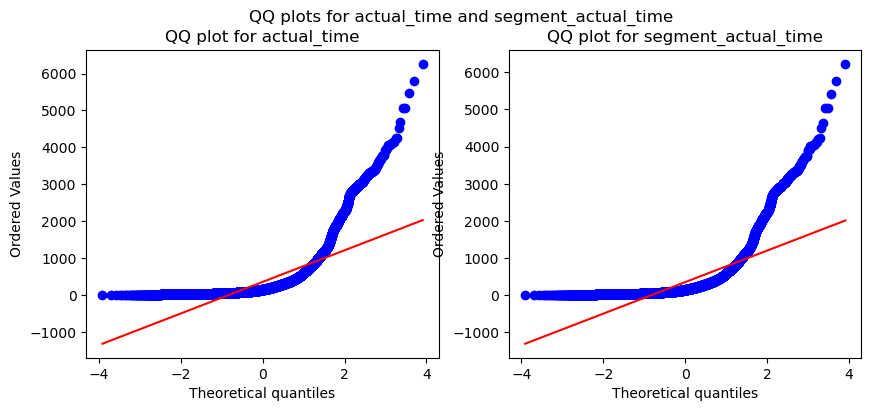

In [193]:
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for actual_time and segment_actual_time')
probplot(df2['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(1, 2, 2)
probplot(df2['segment_actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_actual_time')
plt.show()

samples do not follow normal distribution

**Applying Shapiro-Wilk test for normality**

In [194]:
test_stat, p_value = spy.shapiro(df2['actual_time'].sample(3000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 0.0
The sample does not follow normal distribution


In [196]:
test_stat, p_value = spy.shapiro(df2['segment_actual_time'].sample(3000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')  

p-value 0.0
The sample does not follow normal distribution


**Homogeneity of Variances using Lavene's test**

In [197]:
test_stat, p_value = spy.levene(df2['actual_time'], df2['segment_actual_time'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 0.6955022668700895
The samples have Homogenous Variance 


Since the samples do not come from normal distribution T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [198]:
test_stat, p_value = spy.mannwhitneyu(df2['actual_time'], df2['segment_actual_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ') 

p-value 0.4164235159622476
The samples are similar 


**Since p-value > alpha therfore it can be concluded that actual_time and segment_actual_time are similar**

### 3.5 Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value 

**Null Hypothesis** - There is no difference between osrm distance and segment_osrm distance.

**Alternative Hypothesis** - There is significant difference between osrm distance and segment_osrm distance.

Visual Tests to know if the samples follow normal distribution

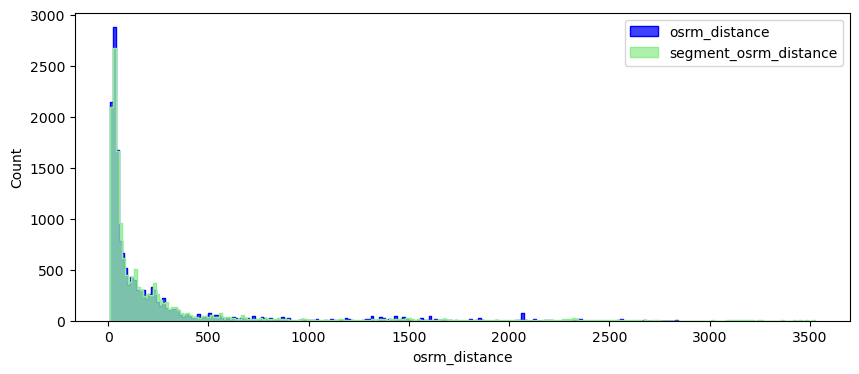

In [201]:
plt.figure(figsize = (10, 4))
sns.histplot(df2['osrm_distance'], element = 'step', color = 'blue')
sns.histplot(df2['segment_osrm_distance'], element = 'step', color = 'lightgreen')
plt.legend(['osrm_distance', 'segment_osrm_distance'])
plt.show()

**Distribution check using QQ Plot**

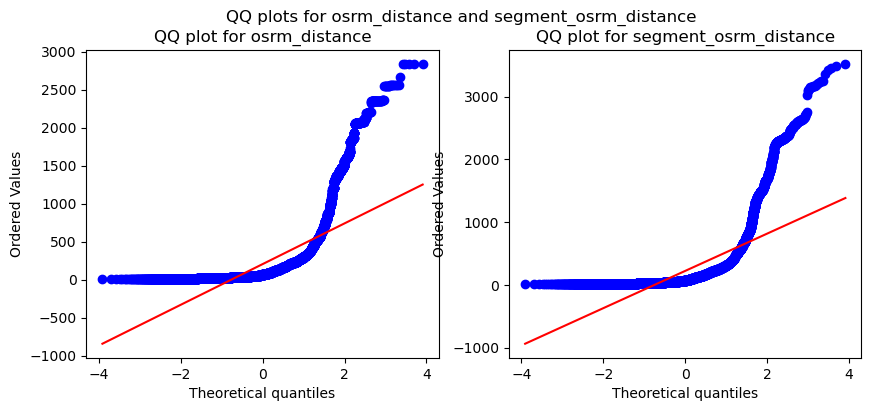

In [202]:
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_distance and segment_osrm_distance')
probplot(df2['osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_distance')
plt.subplot(1, 2, 2)
probplot(df2['segment_osrm_distance'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_distance')
plt.show()

- Samples do not follow normal distribution

**Applying Shapiro-Wilk test for normality**

$H_0$ : The sample **follows normal distribution**
$H_1$ : The sample **does not follow normal distribution**

alpha = 0.05

Test Statistics : **Shapiro-Wilk test for normality**

In [203]:
test_stat, p_value = spy.shapiro(df2['osrm_distance'].sample(3000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 0.0
The sample does not follow normal distribution


In [204]:
test_stat, p_value = spy.shapiro(df2['segment_osrm_distance'].sample(3000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution') 

p-value 0.0
The sample does not follow normal distribution


**Homogeneity of Variances using Lavene's test**

In [206]:
test_stat, p_value = spy.levene(df2['osrm_distance'], df2['segment_osrm_distance'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.00020976354422600578
The samples do not have Homogenous Variance


**Since the samples do not follow any of the assumptions, T-Test cannot be applied here. We can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.**

In [207]:
test_stat, p_value = spy.mannwhitneyu(df2['osrm_distance'], df2['segment_osrm_distance'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ') 

p-value 9.511383588276373e-07
The samples are not similar


**Since p-value < alpha therfore it can be concluded that osrm_distance and segment_osrm_distance are not similar.**

### 3.6 Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value 

**Null Hypothesis** - There is no difference between osrm time and segment_osrm time.

**Alternative Hypothesis** - There is significant difference between osrm time and segment_osrm time.

Visual Tests to know if the samples follow normal distribution

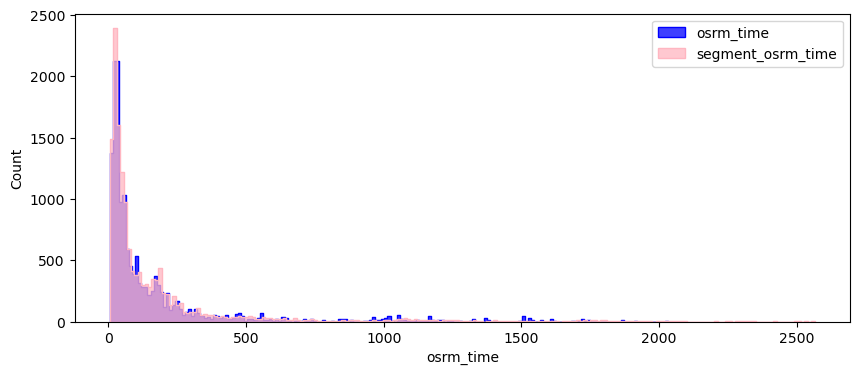

In [209]:
plt.figure(figsize = (10, 4))
sns.histplot(df2['osrm_time'], element = 'step', color = 'blue')
sns.histplot(df2['segment_osrm_time'], element = 'step', color = 'lightpink')
plt.legend(['osrm_time', 'segment_osrm_time'])
plt.show()

**Distribution check using QQ Plot**

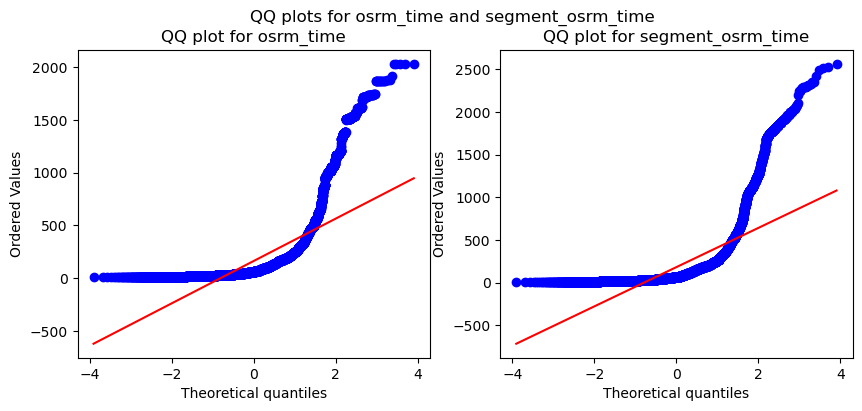

In [210]:
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_time and segment_osrm_time')
probplot(df2['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.subplot(1, 2, 2)
probplot(df2['segment_osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_time')
plt.show()

samples do not follow normal distribution

**Applying Shapiro-Wilk test for normality**


$H_0$ : The sample **follows normal distribution**
$H_1$ : The sample **does not follow normal distribution**

alpha = 0.05

Test Statistics : **Shapiro-Wilk test for normality**

In [211]:
test_stat, p_value = spy.shapiro(df2['osrm_time'].sample(3000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


In [212]:
test_stat, p_value = spy.shapiro(df2['segment_osrm_time'].sample(3000))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')  

p-value 0.0
The sample does not follow normal distribution


**Homogeneity of Variances using Lavene's test**

In [213]:
test_stat, p_value = spy.levene(df2['osrm_time'], df2['segment_osrm_time'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 8.349482669010088e-08
The samples do not have Homogenous Variance


**Since the samples do not follow any of the assumptions, T-Test cannot be applied here. We can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples**

In [214]:
test_stat, p_value = spy.mannwhitneyu(df2['osrm_time'], df2['segment_osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ') 

p-value 2.2995370859748865e-08
The samples are not similar


**Since p-value < alpha therfore it can be concluded that osrm_time and segment_osrm_time are not similar**

### 3.7 Find outliers in the numerical variables

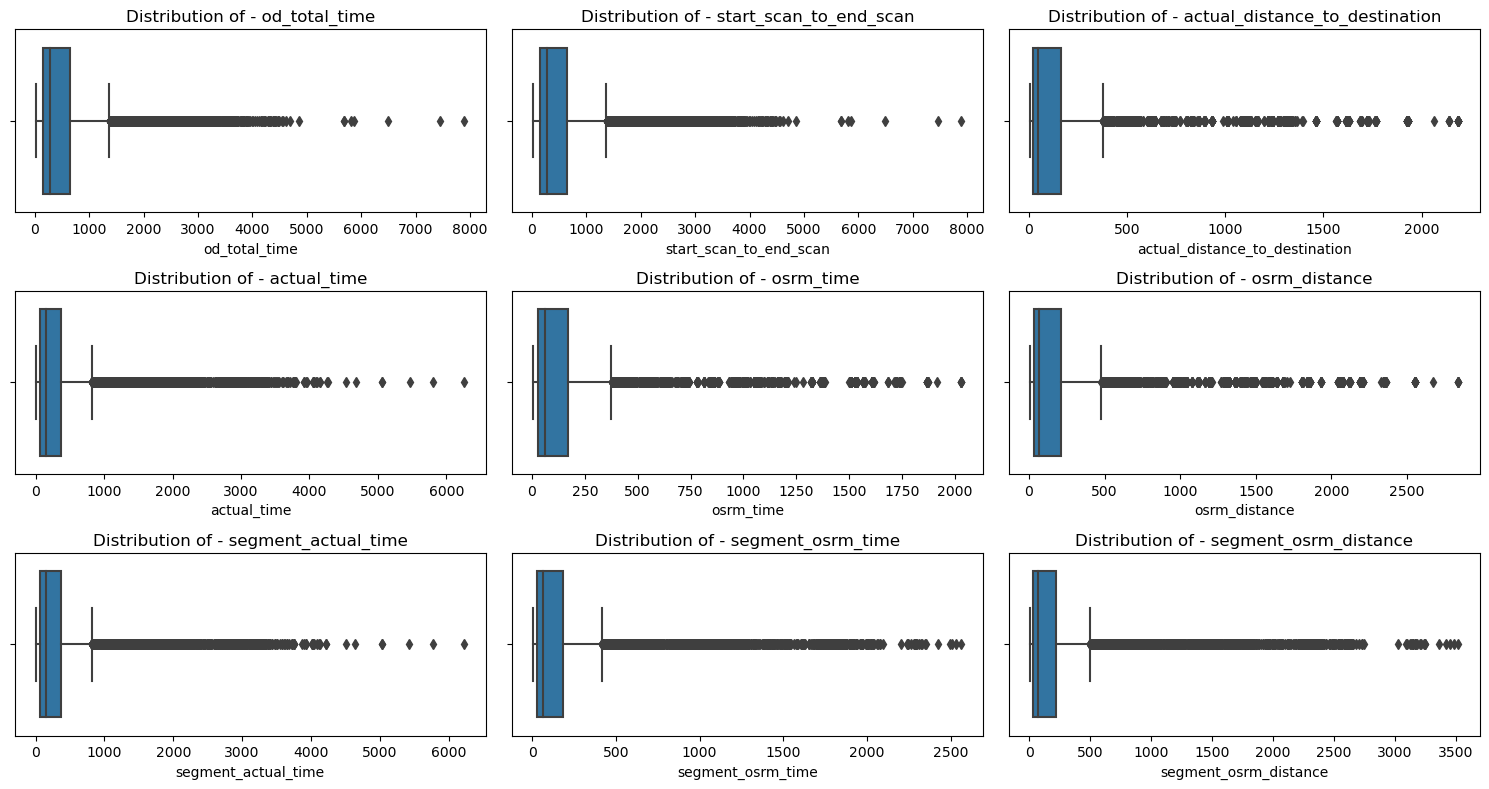

In [216]:
numerical_columns = ['od_total_time', 'start_scan_to_end_scan', 'actual_distance_to_destination',
                    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance']
plt.figure(figsize=(15, 8))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df2[column])
    plt.title(f'Distribution of - {column}')

plt.tight_layout()
plt.show()


In [218]:
#Detecting outliers
for i in numerical_columns:
    Q1 = np.quantile(df2[i], 0.25)
    Q3 = np.quantile(df2[i], 0.75)
    IQR = Q3 - Q1
    LB = Q1 - 1.5 * IQR
    UB = Q3 + 1.5 * IQR
    outliers = df2.loc[(df2[i] < LB) | (df2[i] > UB)]
    print('Column :', i)
    print(f'Q1 : {Q1}')
    print(f'Q3 : {Q3}')
    print(f'IQR : {IQR}')
    print(f'LB : {LB}')
    print(f'UB : {UB}')
    print(f'Number of outliers : {outliers.shape[0]}')
    print('----------------------------------')

Column : od_total_time
Q1 : 149.93
Q3 : 638.2
IQR : 488.27000000000004
LB : -582.4750000000001
UB : 1370.605
Number of outliers : 1266
----------------------------------
Column : start_scan_to_end_scan
Q1 : 149.0
Q3 : 637.0
IQR : 488.0
LB : -583.0
UB : 1369.0
Number of outliers : 1267
----------------------------------
Column : actual_distance_to_destination
Q1 : 22.83723905859321
Q3 : 164.58320763841138
IQR : 141.74596857981817
LB : -189.78171381113404
UB : 377.2021605081386
Number of outliers : 1449
----------------------------------
Column : actual_time
Q1 : 67.0
Q3 : 370.0
IQR : 303.0
LB : -387.5
UB : 824.5
Number of outliers : 1643
----------------------------------
Column : osrm_time
Q1 : 29.0
Q3 : 168.0
IQR : 139.0
LB : -179.5
UB : 376.5
Number of outliers : 1517
----------------------------------
Column : osrm_distance
Q1 : 30.8192
Q3 : 208.475
IQR : 177.6558
LB : -235.6645
UB : 474.9587
Number of outliers : 1524
----------------------------------
Column : segment_actual_time
Q

### Do one-hot encoding of categorical variables

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144867 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144867 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [221]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()
df2['route_type'] = label_encoder.fit_transform(df2['route_type'])
df2['data'] = label_encoder.fit_transform(df2['data'])

In [223]:
df2['route_type'].value_counts()

0    8908
1    5909
Name: route_type, dtype: int64

In [224]:
df2['data'].value_counts()

1    10654
0     4163
Name: data, dtype: int64

In [241]:
df2[['route_type', 'data']].head(10)

,route_type,data
0,1,1
1,0,1
2,1,1
3,0,1
4,1,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


### Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.

In [266]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

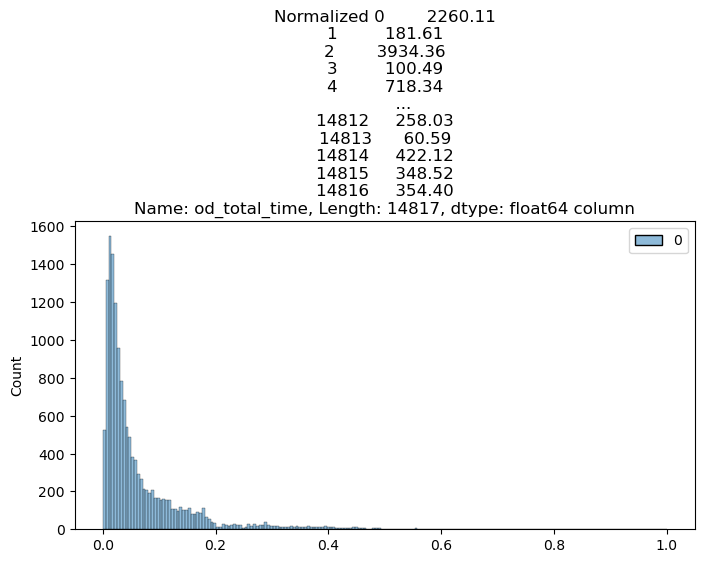

In [263]:
#Normalization

plt.figure(figsize = (8, 4))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['od_total_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['od_total_time']} column")
plt.show()

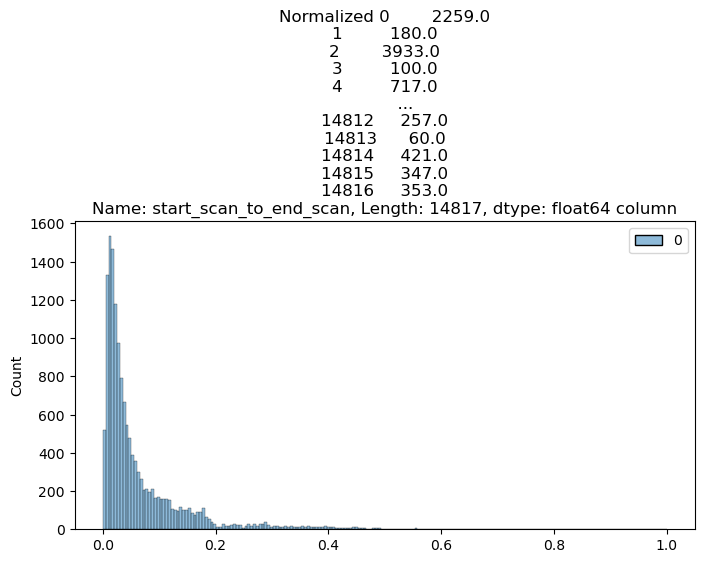

In [265]:
plt.figure(figsize = (8, 4))
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df2['start_scan_to_end_scan'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Normalized {df2['start_scan_to_end_scan']} column")
plt.show()

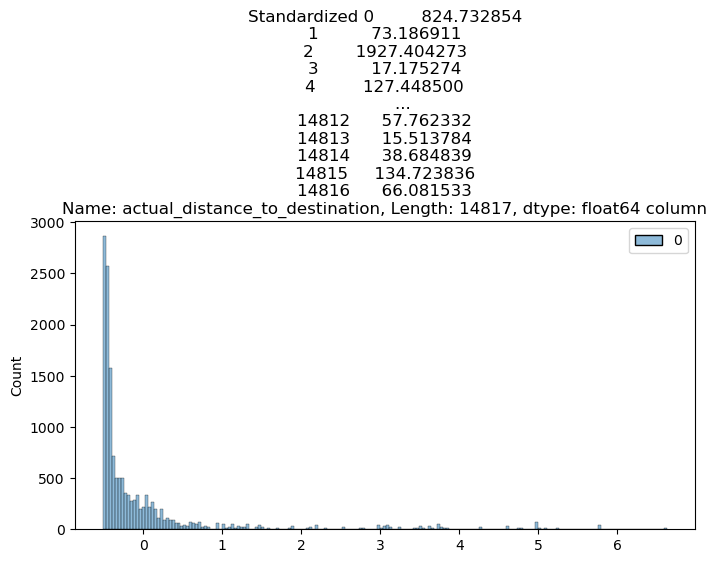

In [267]:
#Standardization

plt.figure(figsize = (8, 4))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['actual_distance_to_destination'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['actual_distance_to_destination']} column")
plt.show()

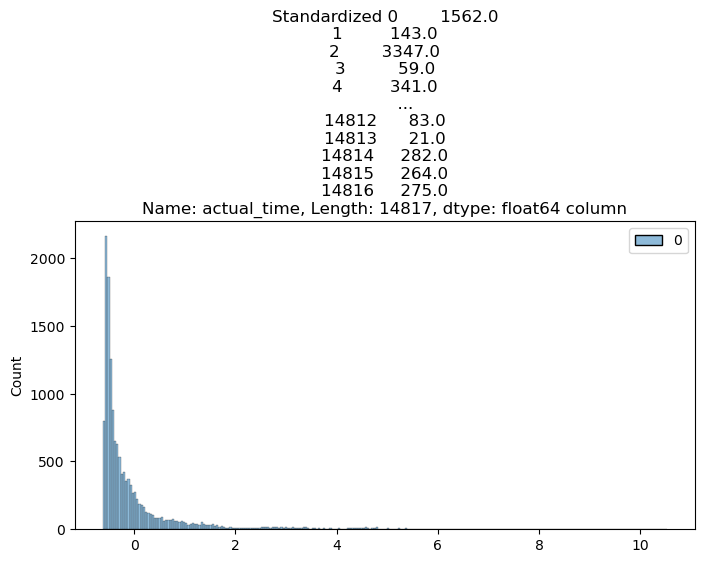

In [268]:
plt.figure(figsize = (8, 4))
scaler = StandardScaler()
scaled = scaler.fit_transform(df2['actual_time'].to_numpy().reshape(-1, 1))
sns.histplot(scaled)
plt.title(f"Standardized {df2['actual_time']} column")
plt.show()

## Business Insights

- The data spans from '2018-09-12 00:00:16' to '2018-10-08 03:00:24', involving 14,817 unique trip IDs, 1,508 unique source centers, 1,481 unique destination centers, 690 unique source cities, and 806 unique destination cities. Testing data predominates over training data.
- Most of the data is for testing than for training, Most common route type is Carting.
- The names of 14 unique location ids are missing in the data.
- Trip count increases post-noon, peaks at 10 P.M., and then decreases. Maximum trips occurred in the 38th week.
- Trips primarily originate from states such as Maharashtra, Karnataka, Haryana, Tamil Nadu, and Telangana.
- Mumbai has the highest number of originated trips, followed by Gurgaon Delhi, Bengaluru, and Bhiwandi, indicating a strong seller base in these cities.
- A majority of orders are placed mid-month, indicating customer preferences for ordering during this period.
- Most destination orders come from cities like Bengaluru, Mumbai, Gurgaon, Bangalore, and Delhi.
- The features actual_time and osrm_time are statistically different.
- The features osrm_distance and segment_osrm_distance are statistically different from each other.

# Recommendations

- A significant number of orders originate from or are destined for states like Maharashtra, Karnataka, Haryana, and Tamil Nadu. Optimizing existing corridors can enhance service penetration in these areas.
- Conducting customer profiling for those in Maharashtra, Karnataka, Haryana, Tamil Nadu, and Uttar Pradesh is essential. Understanding why major orders come from these states will help improve the overall buying and delivery experience for customers.
- Considering state-specific factors like heavy traffic and challenging terrain conditions is crucial for planning and meeting demand, particularly during peak festival seasons.
- The OSRM trip planning system requires enhancements to address discrepancies, especially for transporters relying on the routing engine for optimal results.
- There's a noticeable difference between osrm_time and actual_time. It's crucial for the team to minimize this gap to improve delivery time predictions, ensuring a more accurate estimate for customers.